In [2]:
import sys, os

PROJECT_ROOT = os.path.abspath("..")
sys.path.insert(0, PROJECT_ROOT)

print("PROJECT_ROOT:", PROJECT_ROOT)
print("Files in logs:", os.listdir(os.path.join(PROJECT_ROOT, "logs")))


PROJECT_ROOT: /Users/jerrysun/Desktop/contexto-ai-solver
Files in logs: ['contexto_runs.csv']


In [7]:
import pandas as pd
import matplotlib.pyplot as plt

path = os.path.join(PROJECT_ROOT, "logs", "contexto_runs.csv")
df = pd.read_csv(path)
df.head()

,timestamp,game_id,model,turn,word,score,best_score
0,2025-12-17T16:26:51,277159a8,word2vec-v1,1,human,3834,3834
1,2025-12-17T16:26:52,277159a8,word2vec-v1,2,disambiguation,29481,3834
2,2025-12-17T16:26:53,277159a8,word2vec-v1,3,htm,12175,3834
3,2025-12-17T16:26:54,277159a8,word2vec-v1,4,alla,15821,3834
4,2025-12-17T16:26:55,277159a8,word2vec-v1,5,des,5715,3834


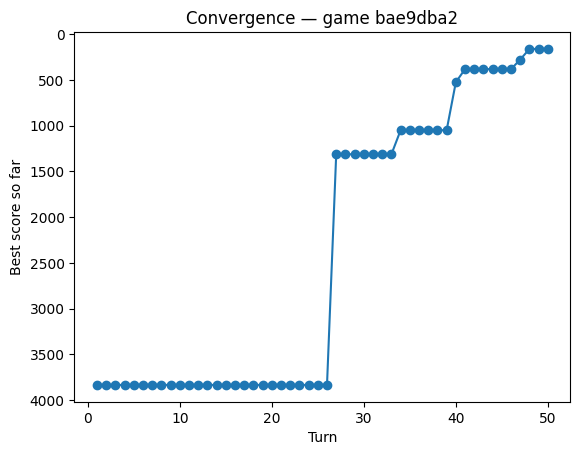

In [8]:
# pick one game
game_id = df["game_id"].iloc[-1]
run = df[df["game_id"] == game_id]

plt.figure()
plt.plot(run["turn"], run["best_score"], marker="o")
plt.gca().invert_yaxis()  # lower is better
plt.xlabel("Turn")
plt.ylabel("Best score so far")
plt.title(f"Convergence — game {game_id}")
plt.show()


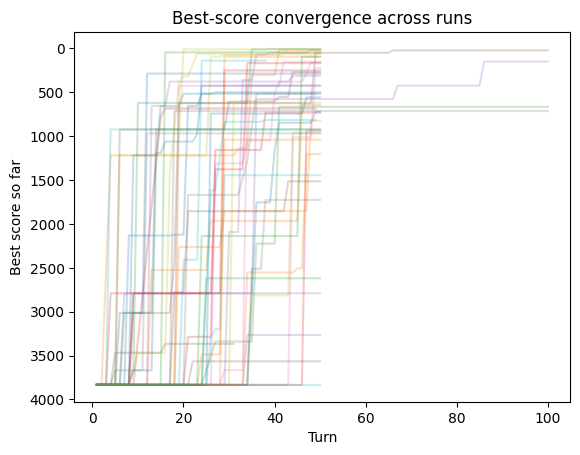

In [9]:
plt.figure()

for game_id, g in df.groupby("game_id"):
    plt.plot(g["turn"], g["best_score"], alpha=0.25)

plt.gca().invert_yaxis()
plt.xlabel("Turn")
plt.ylabel("Best score so far")
plt.title("Best-score convergence across runs")
plt.show()


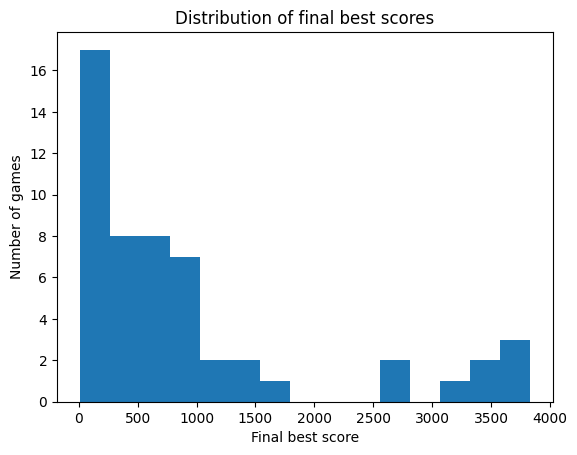

In [10]:
final_scores = (
    df.groupby("game_id")["best_score"]
      .min()
)

plt.figure()
plt.hist(final_scores, bins=15)
plt.xlabel("Final best score")
plt.ylabel("Number of games")
plt.title("Distribution of final best scores")
plt.show()


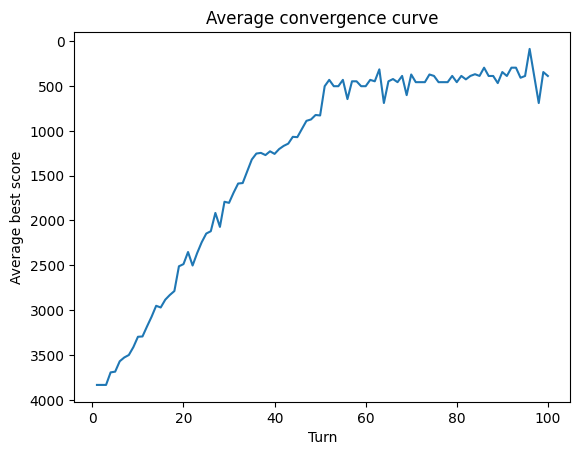

In [11]:
mean_curve = (
    df.groupby("turn")["best_score"]
      .mean()
)

plt.figure()
plt.plot(mean_curve.index, mean_curve.values)
plt.gca().invert_yaxis()
plt.xlabel("Turn")
plt.ylabel("Average best score")
plt.title("Average convergence curve")
plt.show()
